# Case 10: Backtesting Investment Strategies (US Stocks)

## Importing the Data

In [1]:
import pandas as pd
import datetime

In [2]:
pd.read_csv("dji.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4198 non-null   object 
 1   Open       4198 non-null   float64
 2   High       4198 non-null   float64
 3   Low        4198 non-null   float64
 4   Close      4198 non-null   float64
 5   Adj Close  4198 non-null   float64
 6   Volume     4198 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 229.7+ KB


In [3]:
data = pd.read_csv("dji.csv", parse_dates = ["Date"], index_col = "Date")
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2023-08-30,34847.800781,35025.570312,34811.738281,34890.238281,34890.238281,236070000
2023-08-31,34909.089844,35070.210938,34719.769531,34721.910156,34721.910156,341900000
2023-09-01,34876.238281,34979.179688,34720.699219,34837.710938,34837.710938,286370000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4198 entries, 2007-01-03 to 2023-09-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4198 non-null   float64
 1   High       4198 non-null   float64
 2   Low        4198 non-null   float64
 3   Close      4198 non-null   float64
 4   Adj Close  4198 non-null   float64
 5   Volume     4198 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 229.6 KB


In [5]:
df = data.loc["2010-01-01": datetime.date.today(), "Close"].to_frame()
df

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430
...,...
2023-08-30,34890.238281
2023-08-31,34721.910156
2023-09-01,34837.710938


## Data Visualization & Returns

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

C:\Users\batu_\AppData\Local\Temp\ipykernel_3276\232966081.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [7]:
df.describe()

,Close
count,3442.000000
mean,21408.546251
std,7873.106565
min,9686.480469
25%,14970.157227
50%,18575.205078
75%,27180.327148
max,36799.648438


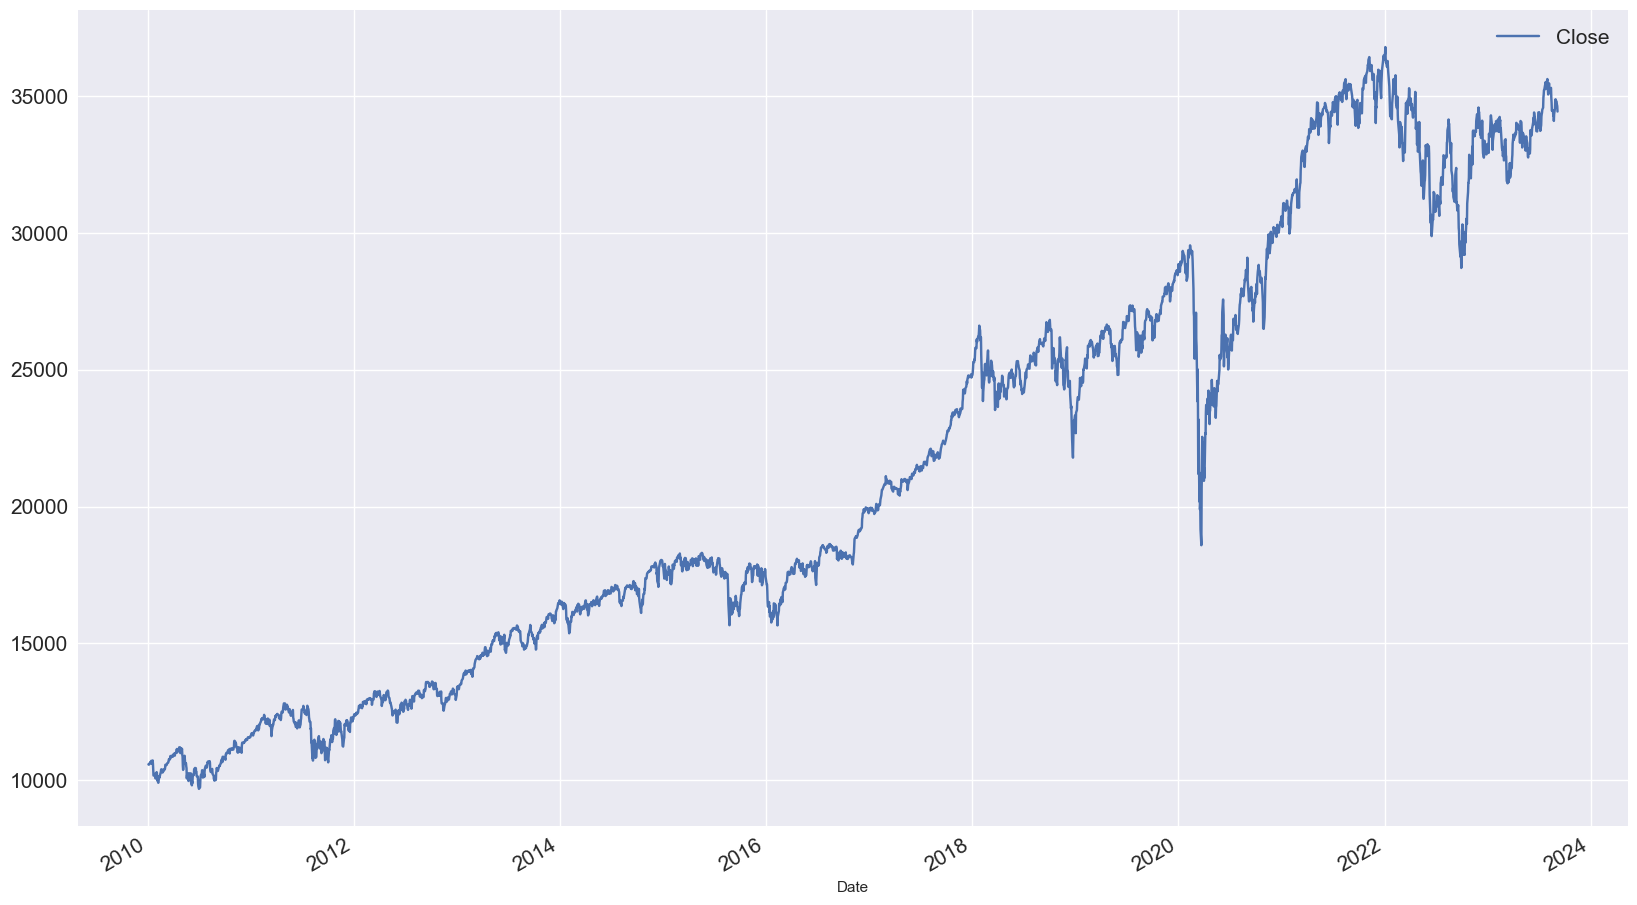

In [8]:
df.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [9]:
df["Return"] = df.pct_change()

In [10]:
df

,Close,Return
Date,,
2010-01-04,10583.959961,NaN
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
...,...,...
2023-08-30,34890.238281,0.001078
2023-08-31,34721.910156,-0.004825
2023-09-01,34837.710938,0.003335


In [11]:
df.dropna(inplace = True)

In [12]:
df

,Close,Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2023-08-30,34890.238281,0.001078
2023-08-31,34721.910156,-0.004825
2023-09-01,34837.710938,0.003335


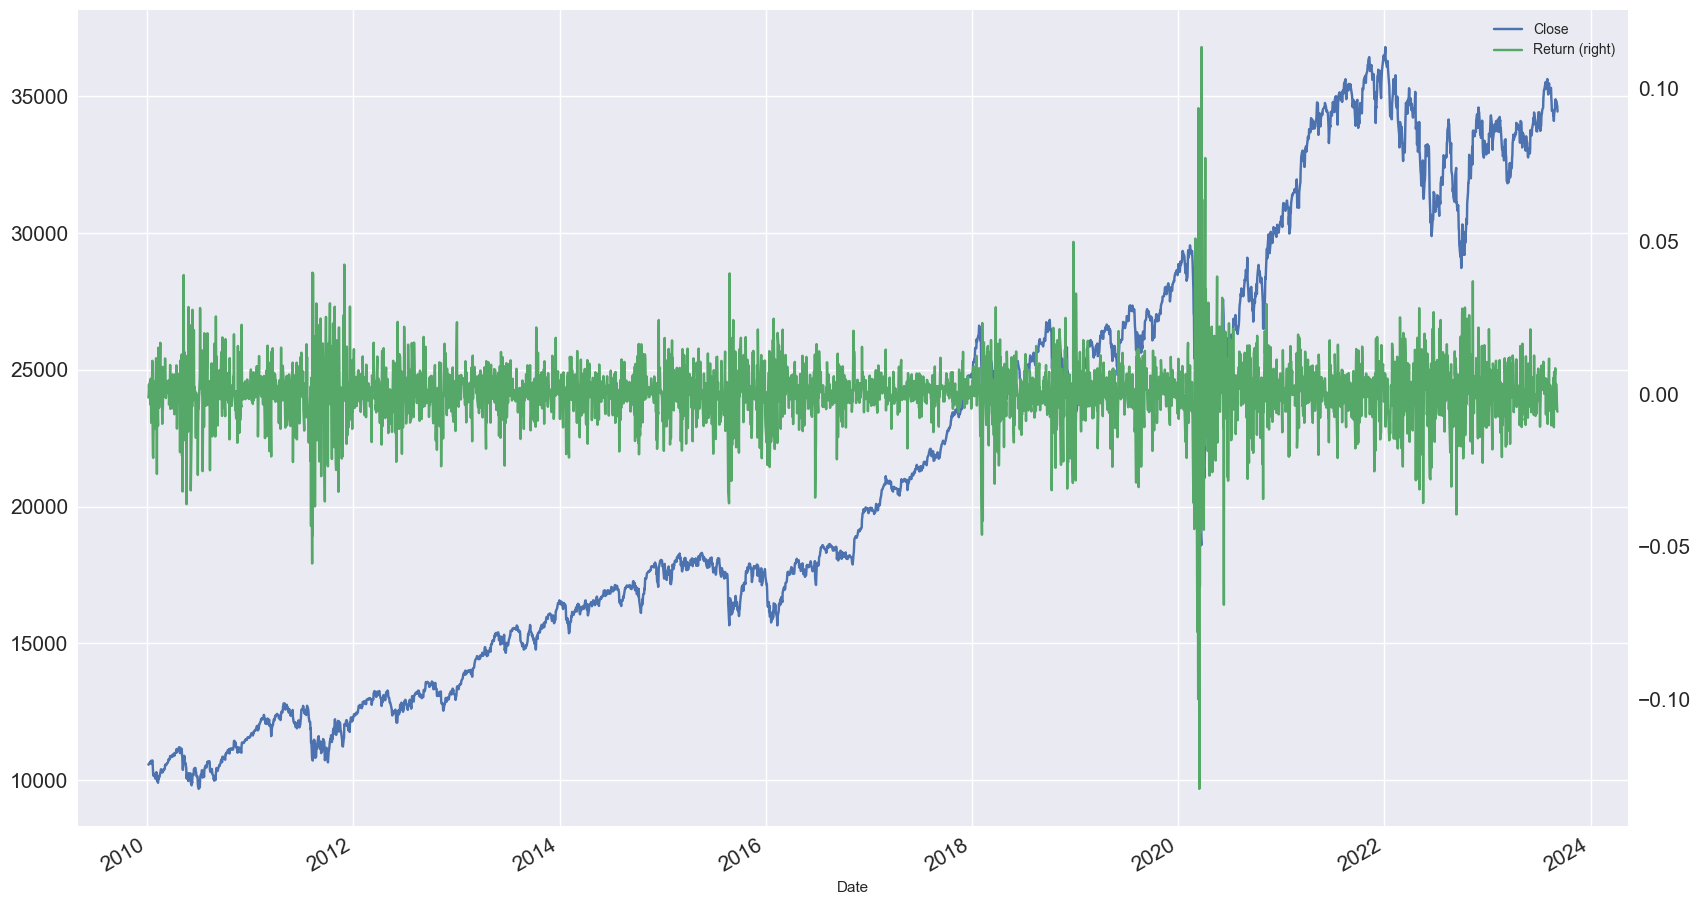

In [13]:
df.plot(figsize = (20, 12), secondary_y = "Return", mark_right = True, fontsize = 15)
plt.show()

In [14]:
df.rename(columns = {"Close":"DJI_Close", "Return":"DJI_Return"}, inplace = True)

In [15]:
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2023-08-30,34890.238281,0.001078
2023-08-31,34721.910156,-0.004825
2023-09-01,34837.710938,0.003335


## Backtesting a simple Momentum Strategy

__Positions__:

+1: Investing in DJI (__long__ position) <br>
-1: Short Selling DJI (__short__ position)<br>
0: No position (__neutral__)

__Strategies__:

-__Buy and Hold__ (Basic Strategy - passive): Initially Investing into DJI and do nothing (Position: +1 on any given day)

-__Simple Momentum__ (active Strategy to be tested): <br>
__a) Investing (+1)__ into DJI tomorrow if today´s return was __positive__ <br>
__b) Short selling (-1)__ DJI tomorrow if today´s return was __negative__

In [16]:
df["Position"] = np.sign(df["DJI_Return"])

In [17]:
df["Position"].shift()

Date
2010-01-05    NaN
2010-01-06   -1.0
2010-01-07    1.0
2010-01-08    1.0
2010-01-11    1.0
             ... 
2023-08-30    1.0
2023-08-31    1.0
2023-09-01   -1.0
2023-09-05    1.0
2023-09-06   -1.0
Name: Position, Length: 3441, dtype: float64

In [18]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2023-08-30,34890.238281,0.001078,1.0
2023-08-31,34721.910156,-0.004825,-1.0
2023-09-01,34837.710938,0.003335,1.0


In [19]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [20]:
df.Strategy_Ret.add(1, fill_value = 0).cumprod()

Date
2010-01-05    1.000000
2010-01-06    0.999843
2010-01-07    1.002981
2010-01-08    1.004052
2010-01-11    1.008383
                ...   
2023-08-30    0.479562
2023-08-31    0.477249
2023-09-01    0.475657
2023-09-05    0.472985
2023-09-06    0.475699
Name: Strategy_Ret, Length: 3441, dtype: float64

In [21]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [22]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2023-08-30,34890.238281,0.001078,1.0,0.001078,5069.943764
2023-08-31,34721.910156,-0.004825,-1.0,-0.004825,5045.483796
2023-09-01,34837.710938,0.003335,1.0,-0.003335,5028.656641


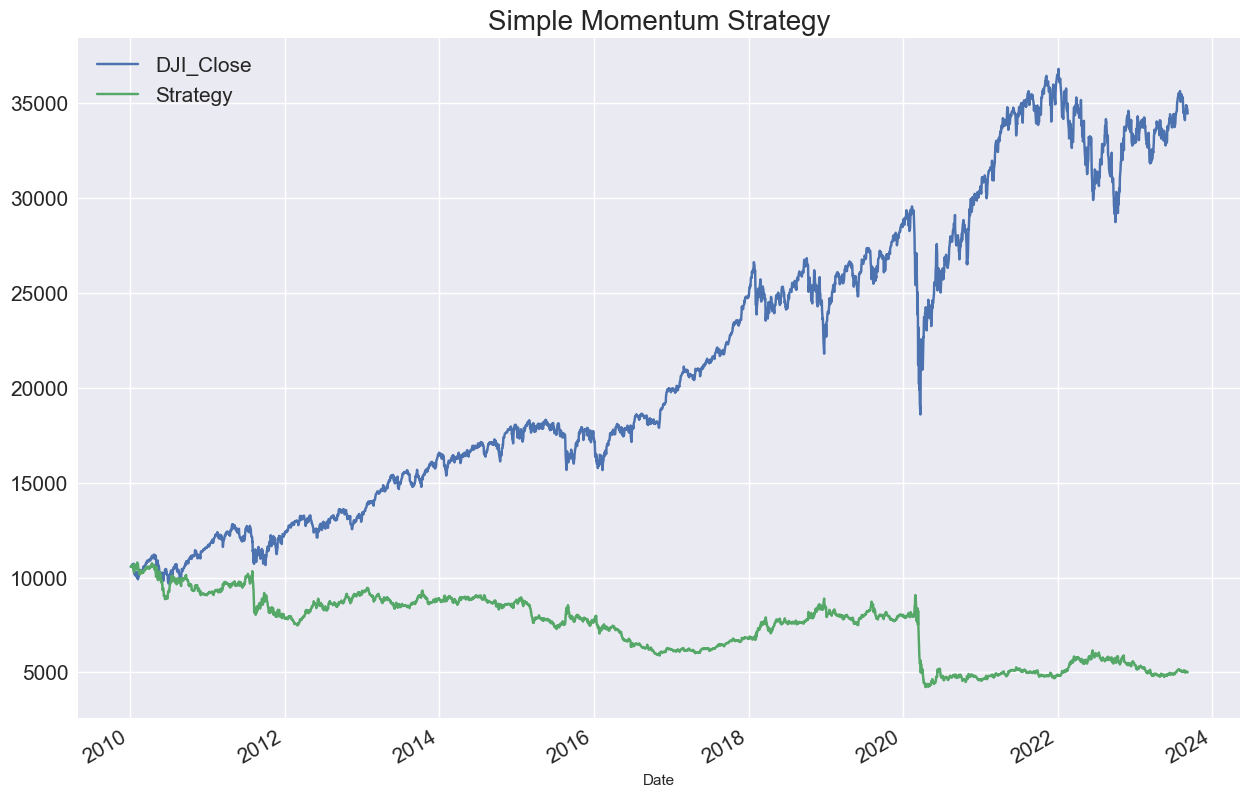

In [23]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.title("Simple Momentum Strategy", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [24]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [25]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.101006,0.170381
Strategy_Ret,-0.039775,0.170482


## Backtesting a simple Contrarian Strategy

__Strategies__:

-__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

-__Simple Contrarian__ (Strategy to be tested): <br>
__a) Short Selling (-1)__ DJI tomorrow if today´s return was __positive__ <br>
__b) Investing (+1)__ into DJI tomorrow if today´s return was __negative__

In [26]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2023-08-30,34847.800781,35025.570312,34811.738281,34890.238281,34890.238281,236070000
2023-08-31,34909.089844,35070.210938,34719.769531,34721.910156,34721.910156,341900000
2023-09-01,34876.238281,34979.179688,34720.699219,34837.710938,34837.710938,286370000


In [36]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2023-08-30,34890.238281,0.001078
2023-08-31,34721.910156,-0.004825
2023-09-01,34837.710938,0.003335


In [37]:
df["Position"] = -np.sign(df["DJI_Return"])

In [38]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,1.0
2010-01-06,10573.679688,0.000157,-1.0
2010-01-07,10606.860352,0.003138,-1.0
2010-01-08,10618.190430,0.001068,-1.0
2010-01-11,10663.990234,0.004313,-1.0
...,...,...,...
2023-08-30,34890.238281,0.001078,-1.0
2023-08-31,34721.910156,-0.004825,1.0
2023-09-01,34837.710938,0.003335,-1.0


In [44]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [45]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN
2010-01-06,10573.679688,0.000157,-1.0,0.000157
2010-01-07,10606.860352,0.003138,-1.0,-0.003138
2010-01-08,10618.190430,0.001068,-1.0,-0.001068
2010-01-11,10663.990234,0.004313,-1.0,-0.004313
...,...,...,...,...
2023-08-30,34890.238281,0.001078,-1.0,-0.001078
2023-08-31,34721.910156,-0.004825,1.0,0.004825
2023-09-01,34837.710938,0.003335,-1.0,0.003335


In [46]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [47]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,-1.0,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,-1.0,-0.003138,10540.499023
2010-01-08,10618.190430,0.001068,-1.0,-0.001068,10529.239831
2010-01-11,10663.990234,0.004313,-1.0,-0.004313,10483.823700
...,...,...,...,...,...
2023-08-30,34890.238281,0.001078,-1.0,-0.001078,14820.186635
2023-08-31,34721.910156,-0.004825,1.0,0.004825,14891.686698
2023-09-01,34837.710938,0.003335,-1.0,0.003335,14941.351850


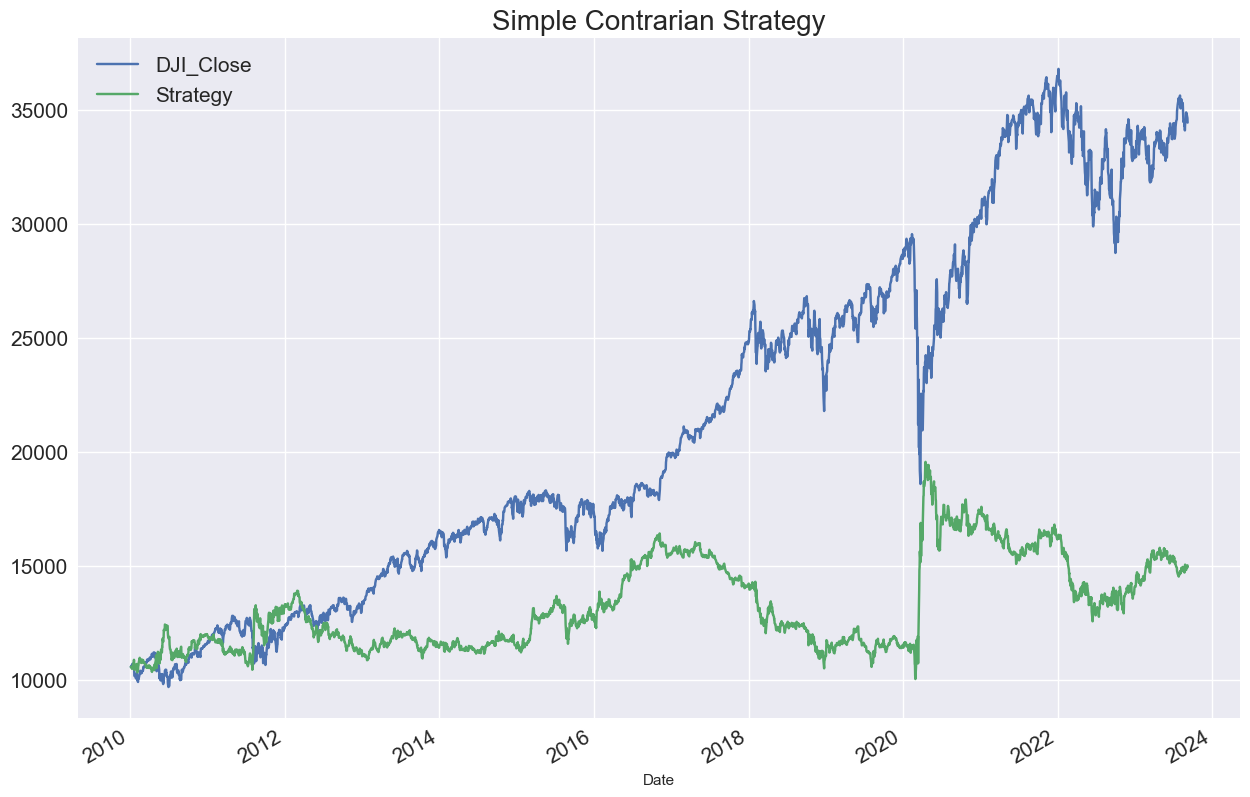

In [48]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

In [53]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.101006,0.170381
Strategy_Ret,0.039775,0.170482


## More complex Strategies & Backtesting vs. Fitting

In [54]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2023-08-30,34847.800781,35025.570312,34811.738281,34890.238281,34890.238281,236070000
2023-08-31,34909.089844,35070.210938,34719.769531,34721.910156,34721.910156,341900000
2023-09-01,34876.238281,34979.179688,34720.699219,34837.710938,34837.710938,286370000


In [55]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2023-08-30,34890.238281,0.001078
2023-08-31,34721.910156,-0.004825
2023-09-01,34837.710938,0.003335


In [56]:
df["Position"] = np.where(df["DJI_Return"] > 0.01, -1, 1)

In [57]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,1
2010-01-06,10573.679688,0.000157,1
2010-01-07,10606.860352,0.003138,1
2010-01-08,10618.190430,0.001068,1
2010-01-11,10663.990234,0.004313,1
...,...,...,...
2023-08-30,34890.238281,0.001078,1
2023-08-31,34721.910156,-0.004825,1
2023-09-01,34837.710938,0.003335,1


In [61]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [62]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1,NaN
2010-01-06,10573.679688,0.000157,1,0.000157
2010-01-07,10606.860352,0.003138,1,0.003138
2010-01-08,10618.190430,0.001068,1,0.001068
2010-01-11,10663.990234,0.004313,1,0.004313
...,...,...,...,...
2023-08-30,34890.238281,0.001078,1,0.001078
2023-08-31,34721.910156,-0.004825,1,-0.004825
2023-09-01,34837.710938,0.003335,1,0.003335


In [63]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [64]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,1,0.003138,10606.860352
2010-01-08,10618.190430,0.001068,1,0.001068,10618.190430
2010-01-11,10663.990234,0.004313,1,0.004313,10663.990234
...,...,...,...,...,...
2023-08-30,34890.238281,0.001078,1,0.001078,86310.949564
2023-08-31,34721.910156,-0.004825,1,-0.004825,85894.541966
2023-09-01,34837.710938,0.003335,1,0.003335,86181.008207


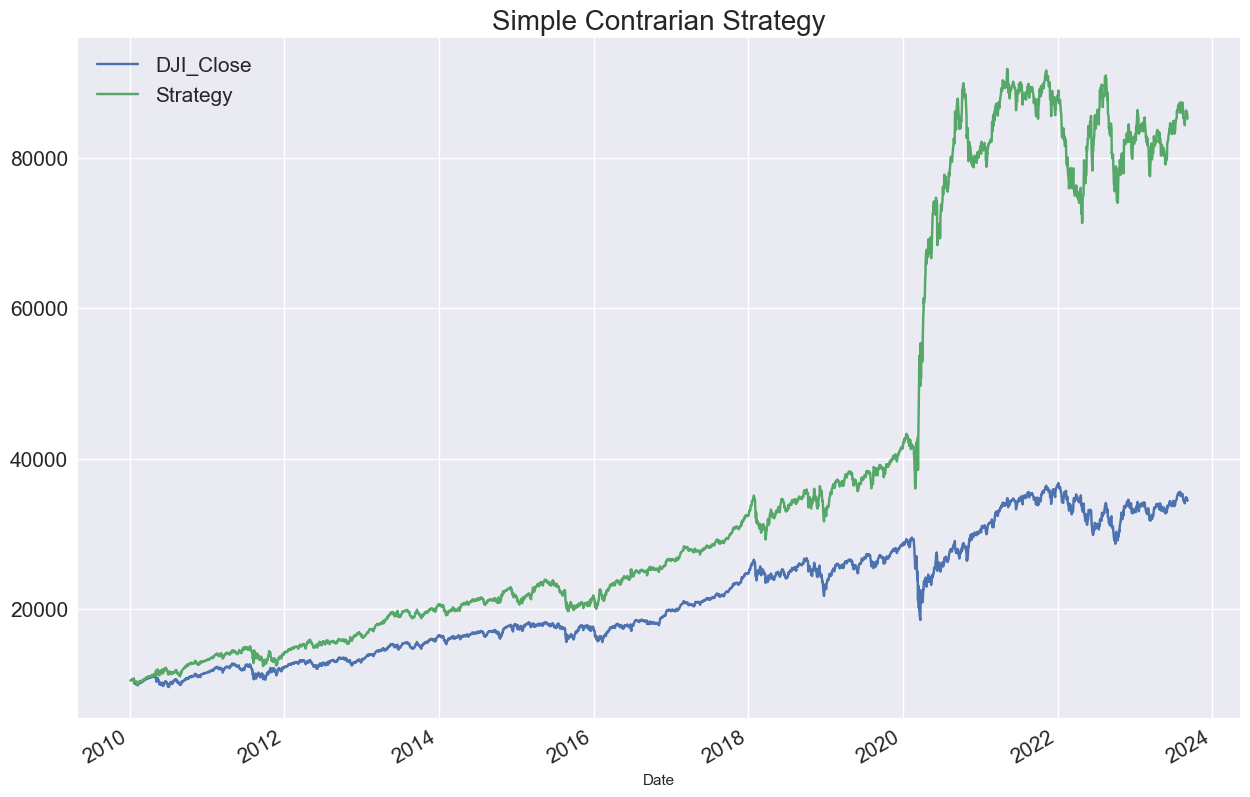

In [65]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

In [66]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.101006,0.170381
Strategy_Ret,0.167333,0.170198


Even if a Strategy __seems to outperform__ the basic Strategy, the following issues need to be considered/analyzed as well: <br>
- Backtesting vs. Fitting -> Was the Strategy __fitted__ and optimized on __historical data__? __Forward Testing__ is required!<br>
- __Transaction Costs__ -> Changing Positions trigger Cost. Include Costs!<br>
- __Tax effects__ -> Changing Positions can trigger (earlier) Tax Payments. Include Taxes!

## Simple Moving Averages (Part 1)

In [67]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2023-08-30,34847.800781,35025.570312,34811.738281,34890.238281,34890.238281,236070000
2023-08-31,34909.089844,35070.210938,34719.769531,34721.910156,34721.910156,341900000
2023-09-01,34876.238281,34979.179688,34720.699219,34837.710938,34837.710938,286370000


In [68]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2023-08-30,34890.238281,0.001078
2023-08-31,34721.910156,-0.004825
2023-09-01,34837.710938,0.003335


In [71]:
df.DJI_Close.rolling(window = 50).mean()

Date
2010-01-05             NaN
2010-01-06             NaN
2010-01-07             NaN
2010-01-08             NaN
2010-01-11             NaN
                  ...     
2023-08-30    34694.539766
2023-08-31    34709.947578
2023-09-01    34727.767578
2023-09-05    34746.058359
2023-09-06    34760.627969
Name: DJI_Close, Length: 3441, dtype: float64

In [72]:
df["SMA50"] = df.DJI_Close.rolling(window = 50).mean()

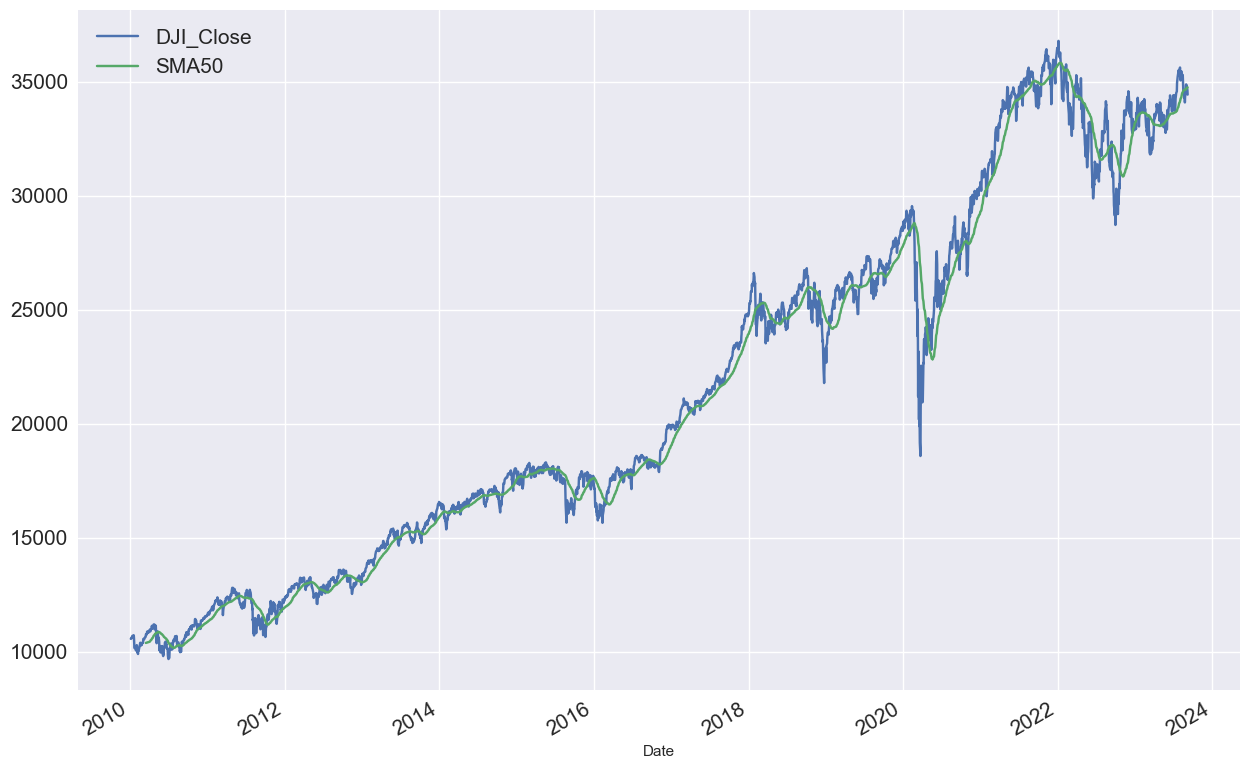

In [73]:
df[["DJI_Close", "SMA50"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [74]:
df["SMA200"] = df.DJI_Close.rolling(window = 200).mean()

In [75]:
df

,DJI_Close,DJI_Return,SMA50,SMA200
Date,,,,
2010-01-05,10572.019531,-0.001128,NaN,NaN
2010-01-06,10573.679688,0.000157,NaN,NaN
2010-01-07,10606.860352,0.003138,NaN,NaN
2010-01-08,10618.190430,0.001068,NaN,NaN
2010-01-11,10663.990234,0.004313,NaN,NaN
...,...,...,...,...
2023-08-30,34890.238281,0.001078,34694.539766,33759.922568
2023-08-31,34721.910156,-0.004825,34709.947578,33764.792822
2023-09-01,34837.710938,0.003335,34727.767578,33771.297881


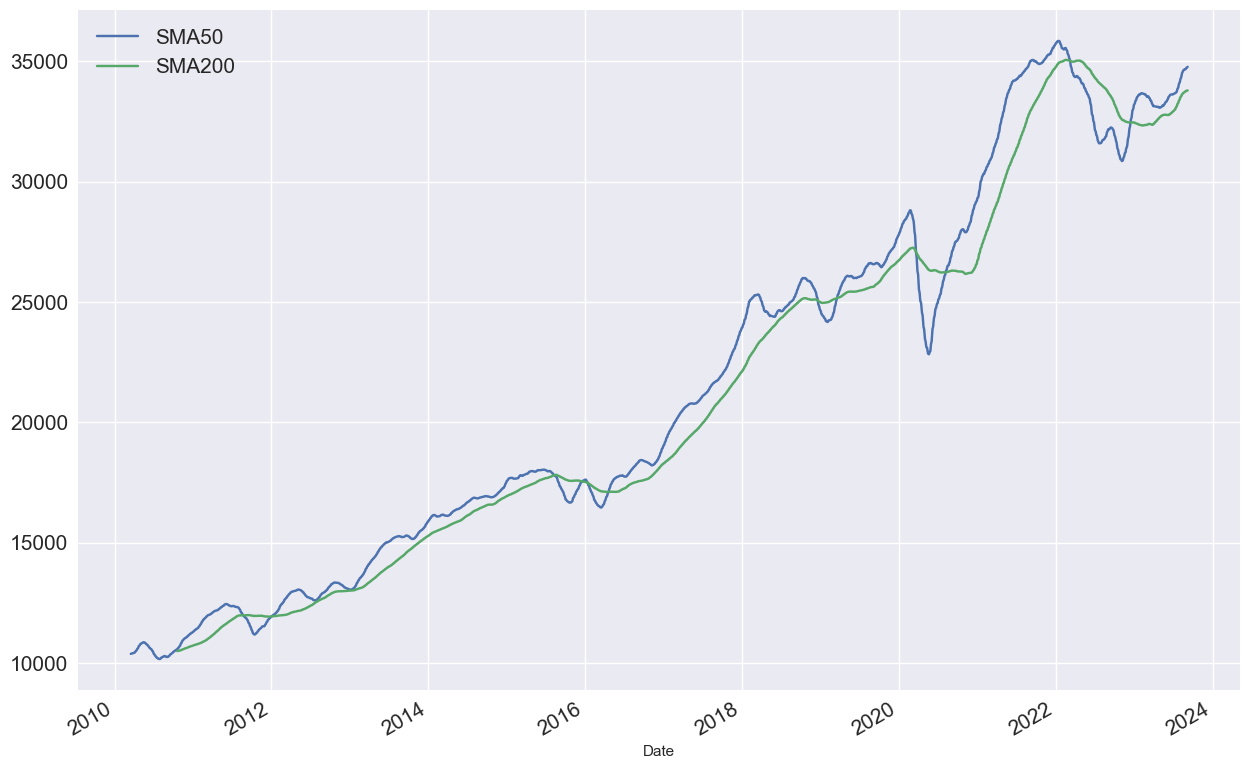

In [76]:
df[["SMA50", "SMA200"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [77]:
df.dropna(inplace= True)

In [78]:
df

,DJI_Close,DJI_Return,SMA50,SMA200
Date,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200
...,...,...,...,...
2023-08-30,34890.238281,0.001078,34694.539766,33759.922568
2023-08-31,34721.910156,-0.004825,34709.947578,33764.792822
2023-09-01,34837.710938,0.003335,34727.767578,33771.297881


## Simple Moving Averages (Part 2)

__Strategies__:

-__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

-__SMA Crossover (Momentum)__ (Strategy to be tested): <br>
__a) Investing (+1)__: SMA50 __>__ SMA200 <br>
__b) Short Selling (-1)__: SMA50 __<__ SMA200

In [83]:
df["Position"] = np.sign(df.SMA50.sub(df.SMA200)) 

In [84]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position
Date,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0
...,...,...,...,...,...
2023-08-30,34890.238281,0.001078,34694.539766,33759.922568,1.0
2023-08-31,34721.910156,-0.004825,34709.947578,33764.792822,1.0
2023-09-01,34837.710938,0.003335,34727.767578,33771.297881,1.0


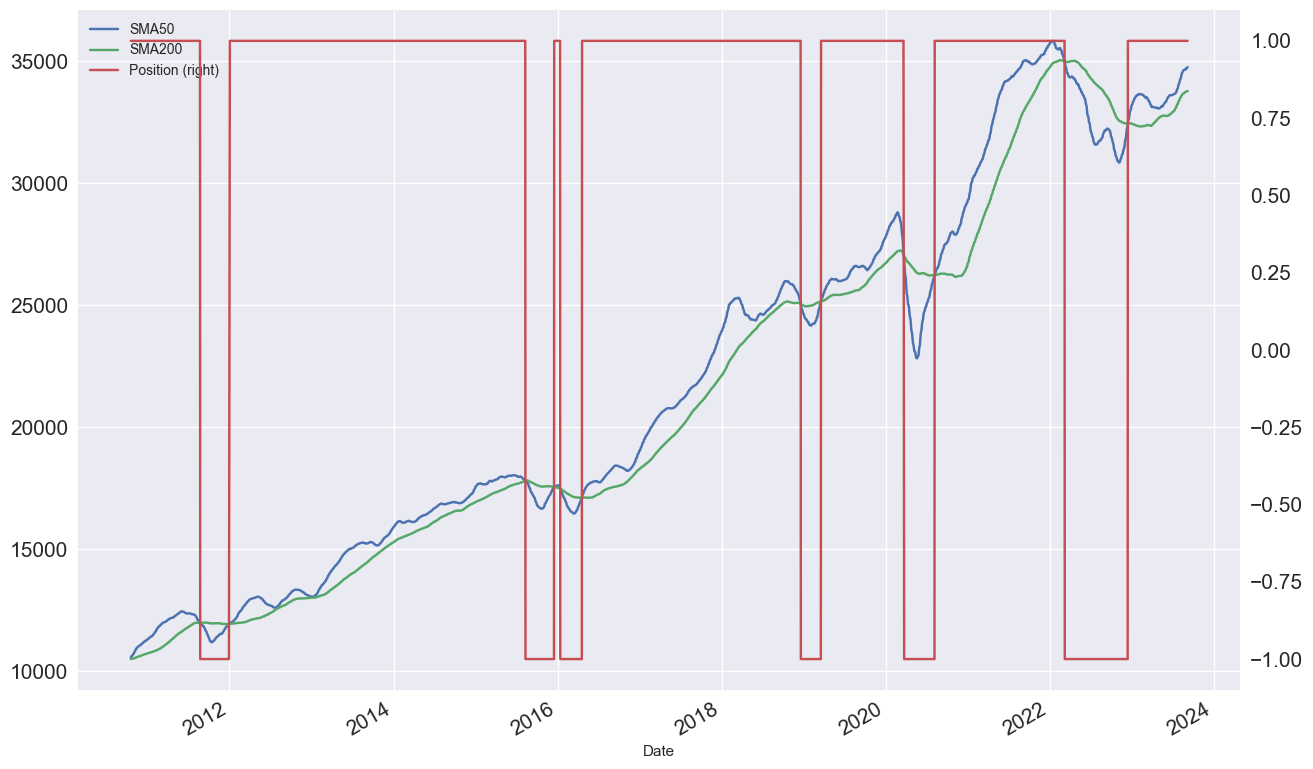

In [85]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (15, 10), secondary_y = "Position", fontsize = 15)
plt.show()

In [88]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [89]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret
Date,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0,NaN
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0,0.011782
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0,0.003475
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0,-0.001257
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0,0.002829
...,...,...,...,...,...,...
2023-08-30,34890.238281,0.001078,34694.539766,33759.922568,1.0,0.001078
2023-08-31,34721.910156,-0.004825,34709.947578,33764.792822,1.0,-0.004825
2023-09-01,34837.710938,0.003335,34727.767578,33771.297881,1.0,0.003335


In [90]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [91]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0,0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0,0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0,-0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0,0.002829,11164.049805
...,...,...,...,...,...,...,...
2023-08-30,34890.238281,0.001078,34694.539766,33759.922568,1.0,0.001078,6942.964672
2023-08-31,34721.910156,-0.004825,34709.947578,33764.792822,1.0,-0.004825,6909.468305
2023-09-01,34837.710938,0.003335,34727.767578,33771.297881,1.0,0.003335,6932.512020


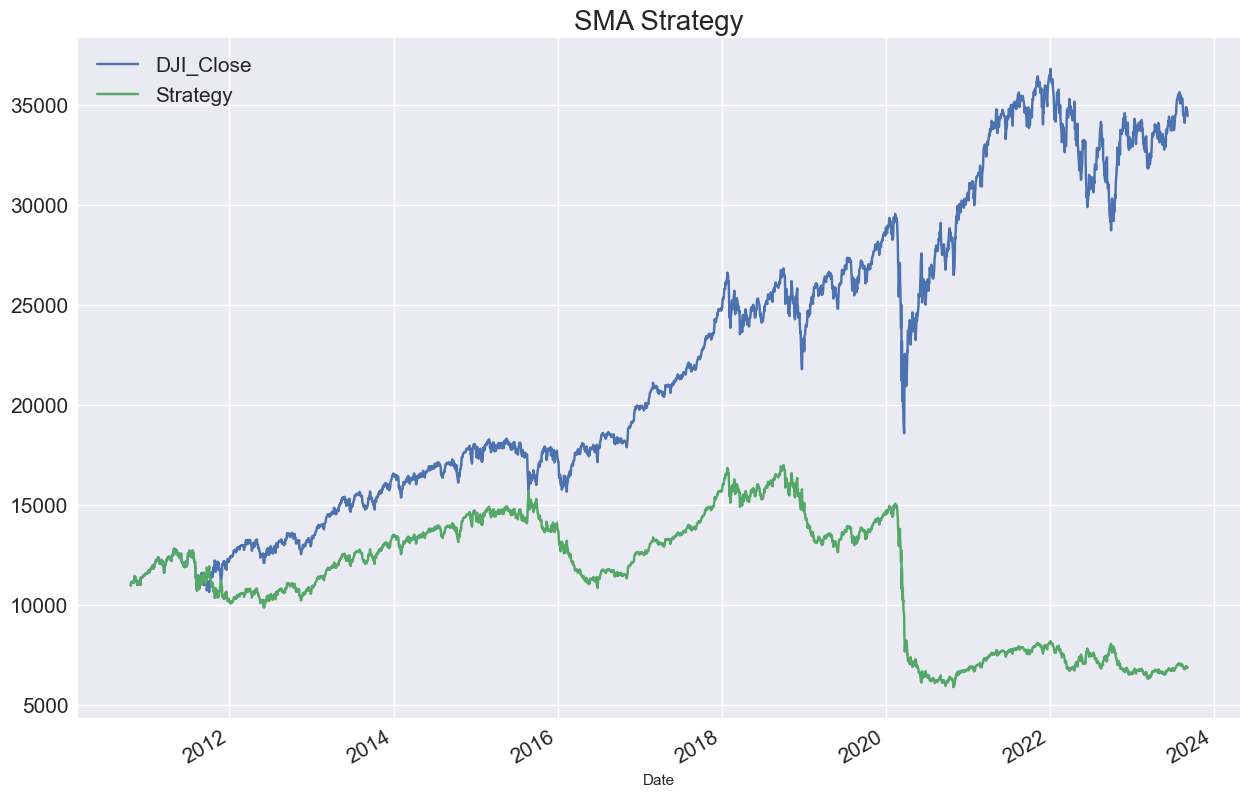

In [92]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("SMA Strategy", fontsize = 20)
plt.show()

In [93]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.102298,0.170321
Strategy_Ret,-0.021943,0.170414


In [94]:
df["Position"] = -np.sign(df.SMA50.sub(df.SMA200)) 

In [95]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,-1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,-1.0,0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,-1.0,0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,-1.0,-0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,-1.0,0.002829,11164.049805
...,...,...,...,...,...,...,...
2023-08-30,34890.238281,0.001078,34694.539766,33759.922568,-1.0,0.001078,6942.964672
2023-08-31,34721.910156,-0.004825,34709.947578,33764.792822,-1.0,-0.004825,6909.468305
2023-09-01,34837.710938,0.003335,34727.767578,33771.297881,-1.0,0.003335,6932.512020


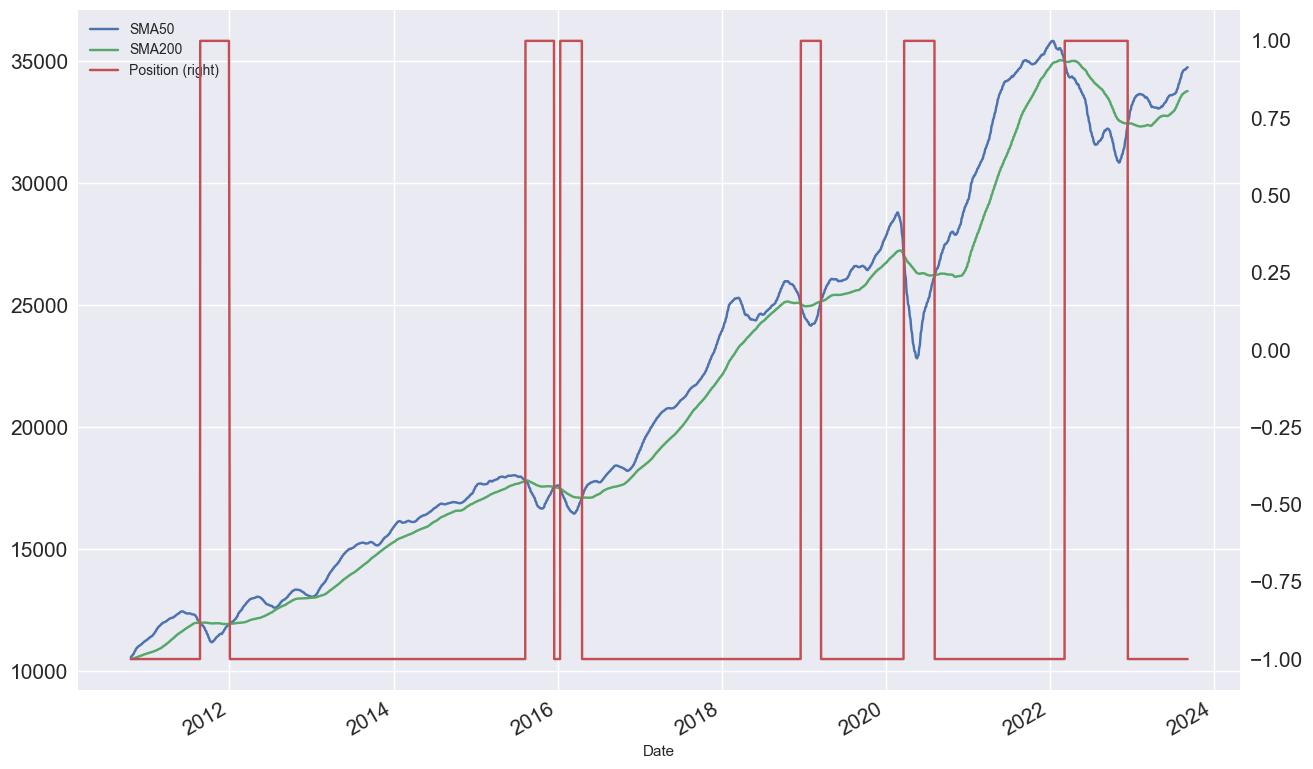

In [96]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (15, 10), secondary_y = "Position", fontsize = 15)
plt.show()

In [97]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [98]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,-1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,-1.0,-0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,-1.0,-0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,-1.0,0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,-1.0,-0.002829,11164.049805
...,...,...,...,...,...,...,...
2023-08-30,34890.238281,0.001078,34694.539766,33759.922568,-1.0,-0.001078,6942.964672
2023-08-31,34721.910156,-0.004825,34709.947578,33764.792822,-1.0,0.004825,6909.468305
2023-09-01,34837.710938,0.003335,34727.767578,33771.297881,-1.0,-0.003335,6932.512020


In [99]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [100]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,-1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,-1.0,-0.011782,10849.270508
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,-1.0,-0.003475,10811.568911
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,-1.0,0.001257,10825.158571
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,-1.0,-0.002829,10794.537870
...,...,...,...,...,...,...,...
2023-08-30,34890.238281,0.001078,34694.539766,33759.922568,-1.0,-0.001078,11945.902996
2023-08-31,34721.910156,-0.004825,34709.947578,33764.792822,-1.0,0.004825,12003.536063
2023-09-01,34837.710938,0.003335,34727.767578,33771.297881,-1.0,-0.003335,11963.503161


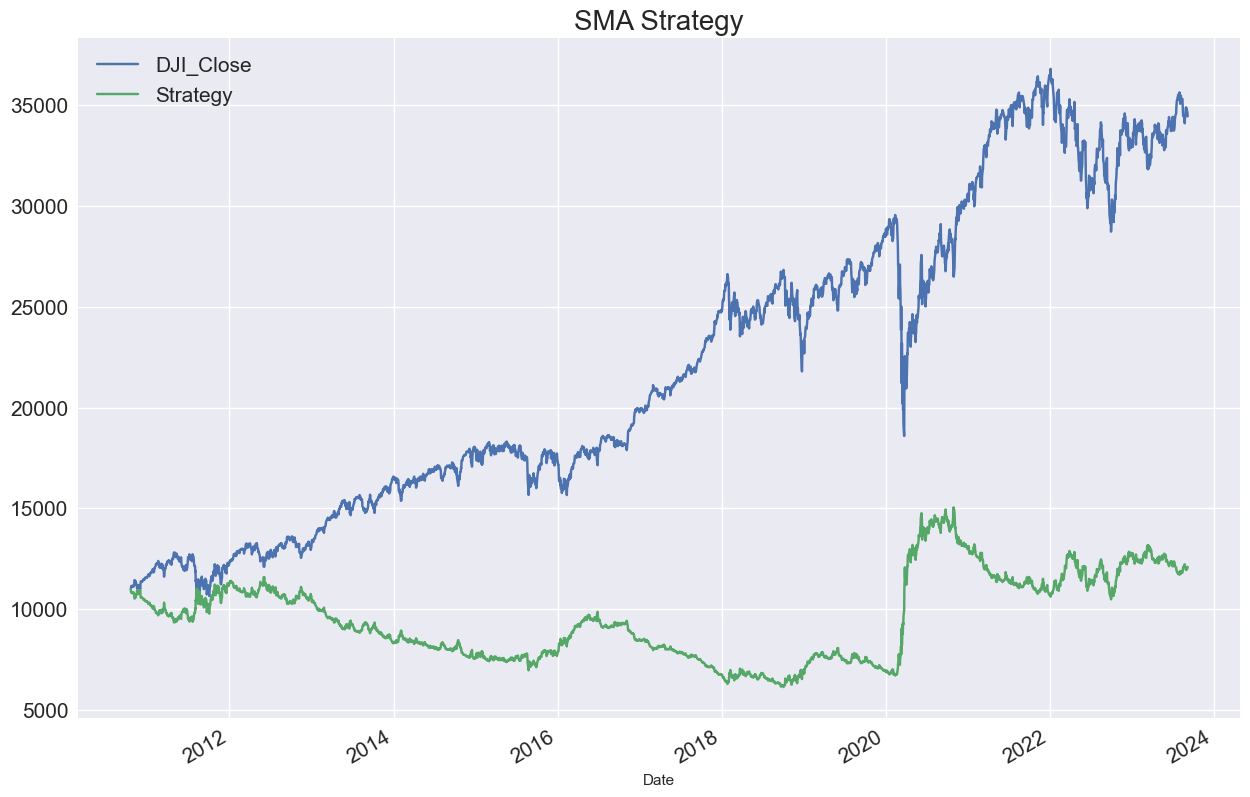

In [101]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("SMA Strategy", fontsize = 20)
plt.show()

In [102]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.102298,0.170321
Strategy_Ret,0.021943,0.170414


## Backtesting the Perfect Strategy (...in case you can predict the future...)

In [103]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2023-08-30,34847.800781,35025.570312,34811.738281,34890.238281,34890.238281,236070000
2023-08-31,34909.089844,35070.210938,34719.769531,34721.910156,34721.910156,341900000
2023-09-01,34876.238281,34979.179688,34720.699219,34837.710938,34837.710938,286370000


In [104]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2023-08-30,34890.238281,0.001078
2023-08-31,34721.910156,-0.004825
2023-09-01,34837.710938,0.003335


In [105]:
df["Position"] = np.sign(df["DJI_Return"])

In [106]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2023-08-30,34890.238281,0.001078,1.0
2023-08-31,34721.910156,-0.004825,-1.0
2023-09-01,34837.710938,0.003335,1.0


In [107]:
df["Strategy_Ret"] = df["Position"] * df["DJI_Return"]

In [108]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,0.001128
2010-01-06,10573.679688,0.000157,1.0,0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2023-08-30,34890.238281,0.001078,1.0,0.001078
2023-08-31,34721.910156,-0.004825,-1.0,0.004825
2023-09-01,34837.710938,0.003335,1.0,0.003335


In [109]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [110]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,0.001128,1.058395e+04
2010-01-06,10573.679688,0.000157,1.0,0.000157,1.058561e+04
2010-01-07,10606.860352,0.003138,1.0,0.003138,1.061883e+04
2010-01-08,10618.190430,0.001068,1.0,0.001068,1.063017e+04
2010-01-11,10663.990234,0.004313,1.0,0.004313,1.067602e+04
...,...,...,...,...,...
2023-08-30,34890.238281,0.001078,1.0,0.001078,2.188856e+14
2023-08-31,34721.910156,-0.004825,-1.0,0.004825,2.199416e+14
2023-09-01,34837.710938,0.003335,1.0,0.003335,2.206751e+14


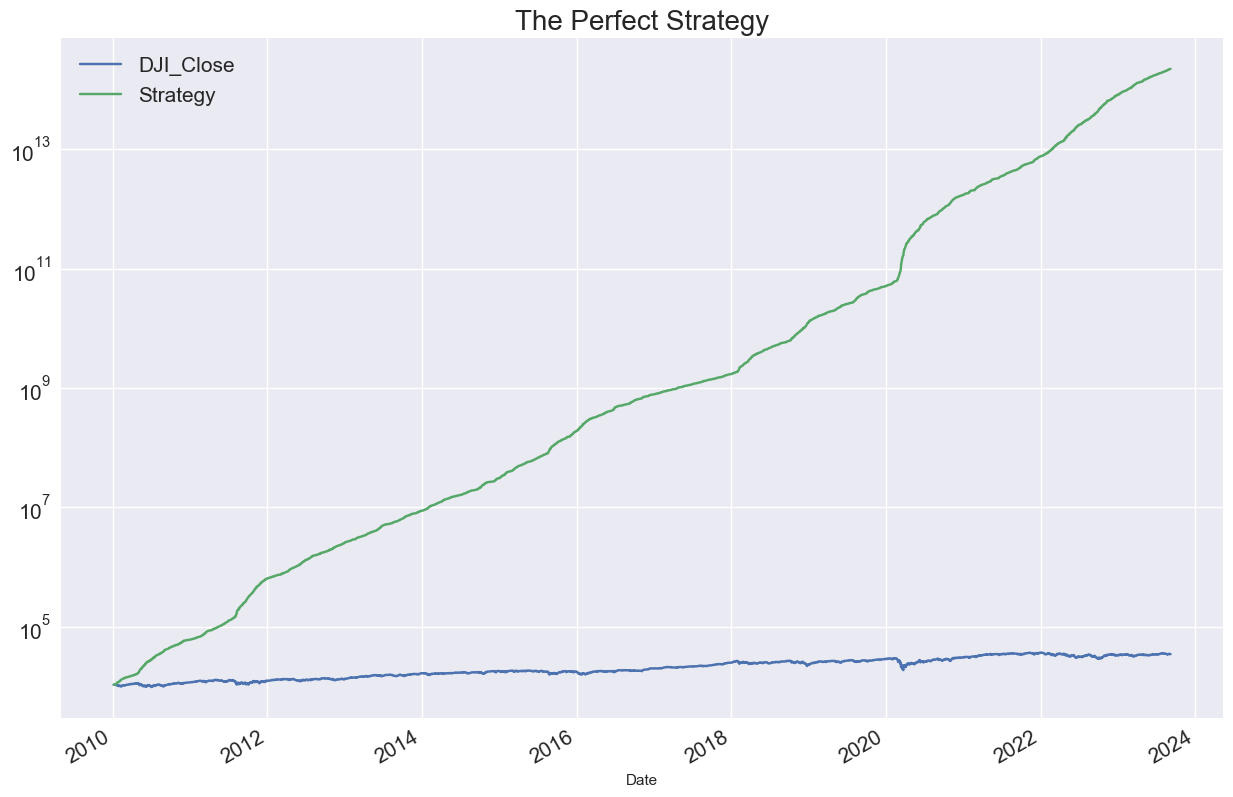

In [111]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15, logy = True)
plt.legend(fontsize = 15)
plt.title("The Perfect Strategy", fontsize = 20)
plt.show()

In [112]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.101006,0.170381
Strategy_Ret,1.755209,0.129774
